Problem Statement :
A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.
Determine what makes a person at risk for stroke.
Create a machine learning model to perform early detection of stroke for patients.

In [74]:
# Import Imprtant Libraries
import numpy as np      
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r"Stroke_Dataset.csv")
print (data.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


: 

Attribute Information
1) Id: Unique identifier.
2) Gender: "Male", "Female" or "Other".
3) Age: Age of the patient.
4) Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
5) Heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
6) Ever_married: "No" or "Yes".
7) Work_type: "Children", "Govt job", "Never worked", "Private" or "Self-employed".
8) Residence_type: "Rural" or "Urban".
9) Avg_glucose_level: Average glucose level in blood.
10) BMI: Body Mass Index.
11) Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown".
12) Stroke: 1 if the patient had a stroke or 0 if not.

Exploratory Data Analysis(EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


: 

In [ ]:
data.drop(index = data[data['gender']=='Other'].index[0] , axis=0, inplace = True)

: 

In [ ]:
data.drop('id', axis = 1, inplace = True)

: 

In [ ]:
df=data.copy()
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


: 

<span style="font-size: 28px; color: red;">Data Visualization</span>  

<span style="font-size: 28px; color: red;">Categorical Data</span>  
<span style="font-size: 22px; color: blue;">- Gender ;</span>

Unique values
 ['Male' 'Female']
Value Counts
 gender
Female    2994
Male      2115
Name: count, dtype: int64


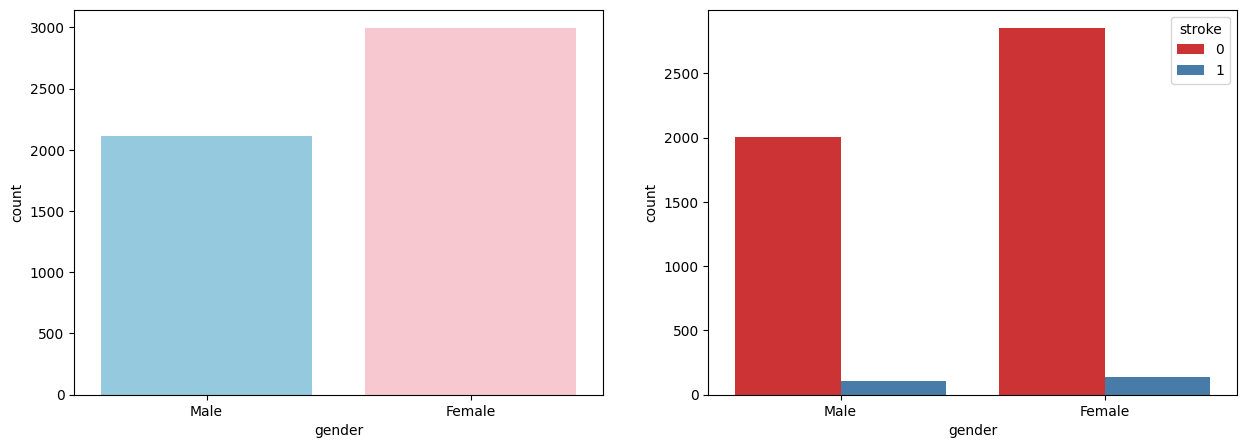

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Gender Visualization.
sns.countplot(x=df['gender'], data=df, ax = axes[0], palette={'Male': 'skyblue', 'Female': 'pink'})
sns.countplot(x=df['gender'], hue='stroke', data=df, ax = axes[1], palette="Set1")
plt.show()

Observation:- We can see that, there is not much difference between stroke rate concerning gender.

<span style="font-size: 22px; color: blue;">Hypertension</span>

Unique values
 [0 1]
Value Counts
 hypertension
0    4611
1     498
Name: count, dtype: int64


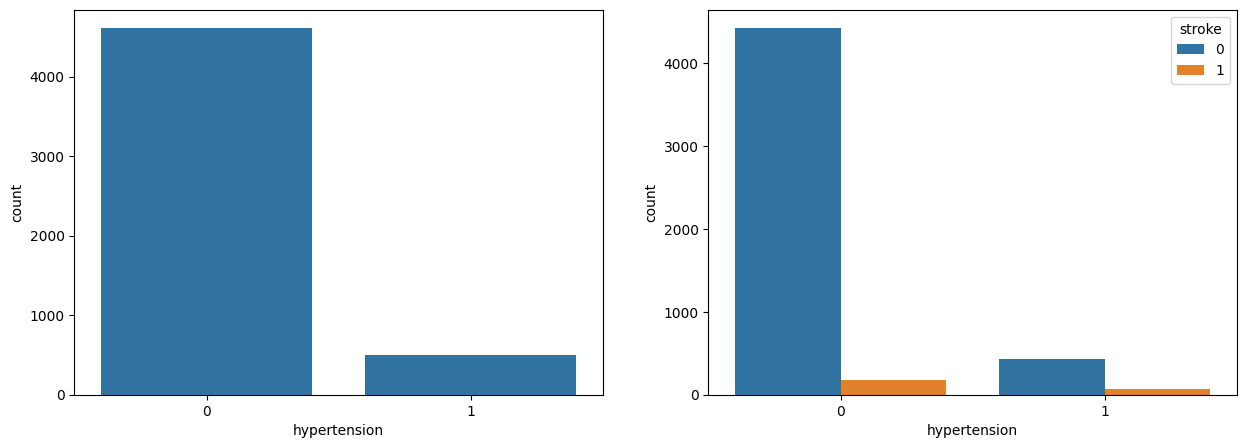

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['hypertension'].unique())
print('Value Counts\n',df['hypertension'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Hypertension Visualization.
sns.countplot(x=df['hypertension'], data=df, ax = axes[0])
sns.countplot(x=df['hypertension'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- Hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. It has quite little data on patients having hypertension.

<span style="font-size: 24px; color: blue;">Heart Disease</span> 

Unique values
 [1 0]
Value Counts
 heart_disease
0    4833
1     276
Name: count, dtype: int64


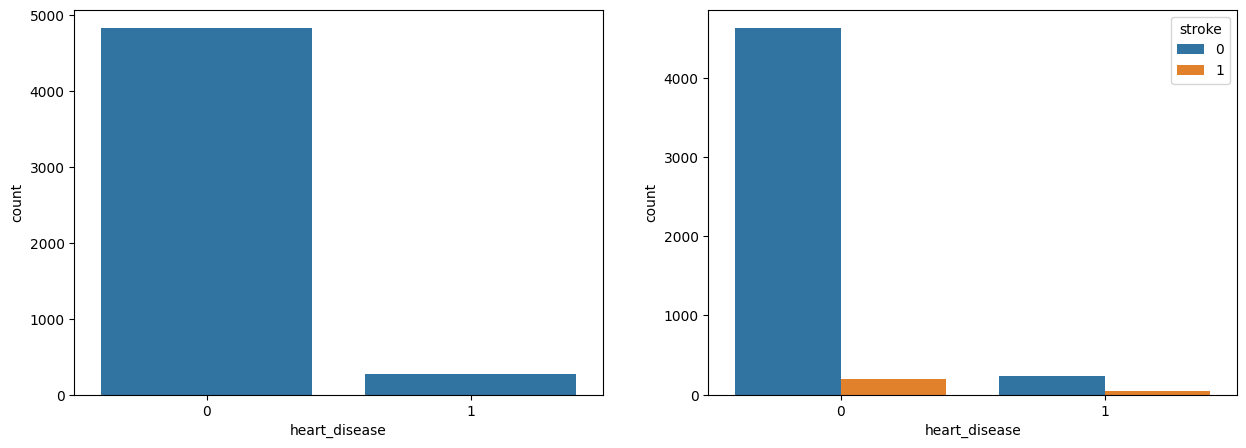

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))    ##Heart_Disease Visualization.
sns.countplot(x=df['heart_disease'], data=df, ax = axes[0])
sns.countplot(x=df['heart_disease'], hue='stroke', data=df, ax = axes[1])
plt.show()

It’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

<span style="font-size: 24px; color: blue;">Marital Status</span>

Unique values
 ['Yes' 'No']
Value Counts
 ever_married
Yes    3353
No     1756
Name: count, dtype: int64


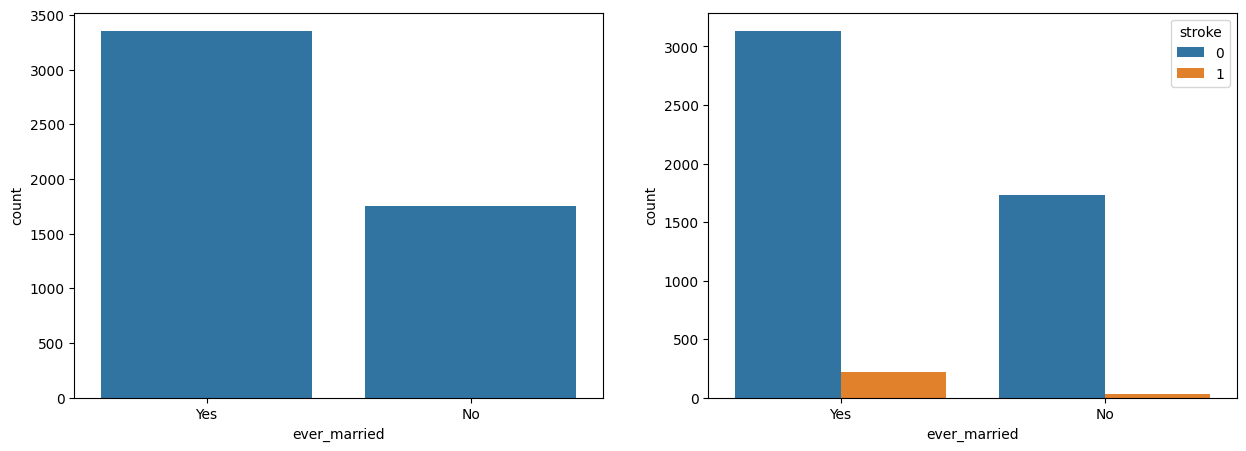

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Ever_Married Visualization.
sns.countplot(x=df['ever_married'], data=df, ax = axes[0])
sns.countplot(x=df['ever_married'], hue='stroke', data=df, ax = axes[1])
plt.show()

As per the plot, there is little bit possibility that married person can have stroke.

<span style="font-size: 24px; color: blue;">Work Type</span>

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64


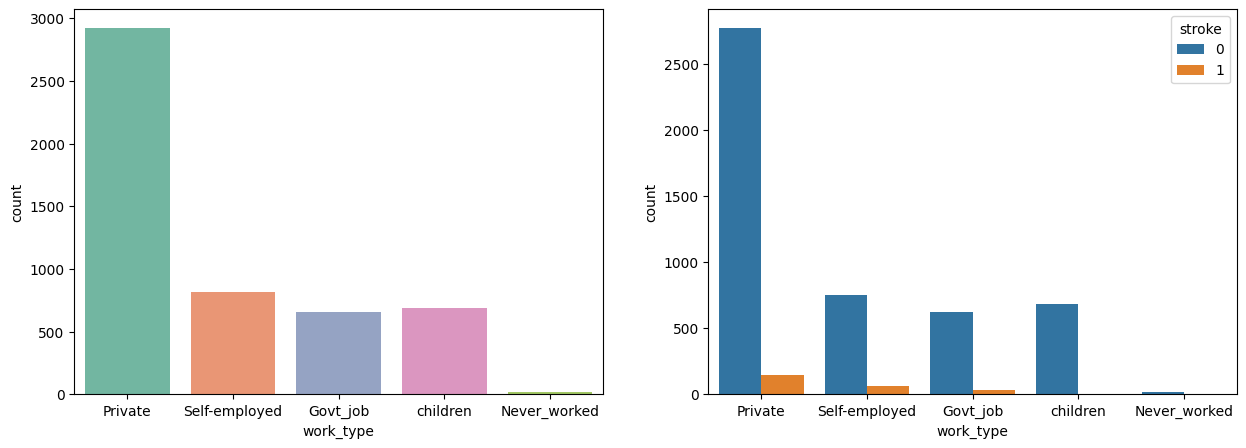

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Work_Type Visualization.
sns.countplot(x=df['work_type'], data=df, ax = axes[0], palette='Set2')
sns.countplot(x=df['work_type'], hue='stroke', data=df, ax = axes[1])
plt.show()


People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

<span style="font-size: 24px; color: blue;">Residence Type</span>

Unique values
 ['Urban' 'Rural']
Value Counts
 Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64


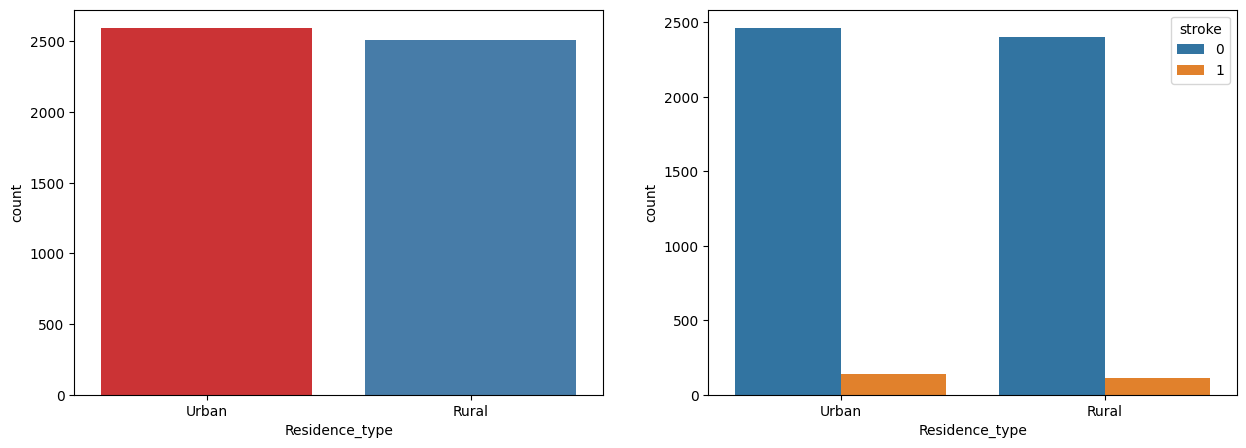

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['Residence_type'].unique())
print('Value Counts\n',df['Residence_type'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Residence_Type Visualization.
sns.countplot(x=df['Residence_type'], data=df, ax = axes[0], palette='Set1')
sns.countplot(x=df['Residence_type'], hue='stroke', data=df, ax = axes[1])
plt.show()


As we can see there not much difference in both attribute values.

<span style="font-size: 24px; color: blue;">Smoking Status</span>

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64


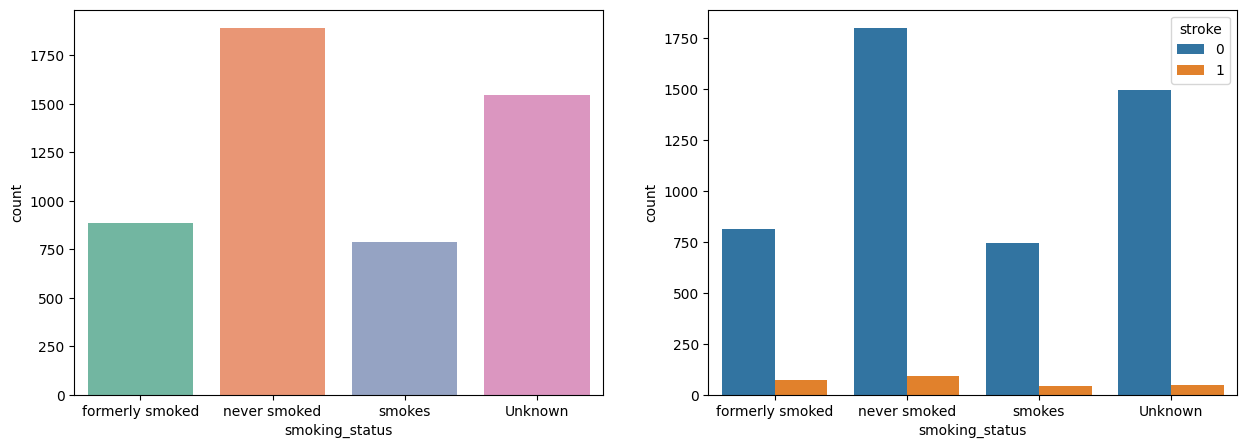

: 

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Smoking_Status Visualization.
sns.countplot(x=df['smoking_status'], data=df, ax = axes[0], palette='Set2')
sns.countplot(x=df['smoking_status'], hue='stroke', data=df, ax = axes[1])
plt.show()

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

<span style="font-size: 24px; color: blue;">Stroke</span>

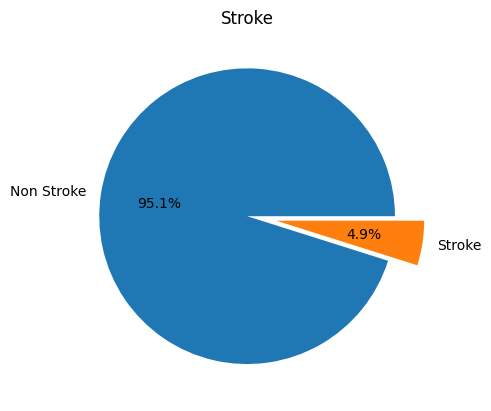

: 

In [ ]:
plt.title("Stroke")     ## Stroke Visualization
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0,0.2],autopct='%1.1f%%')
plt.show()

<span style="font-size: 28px; color: red;">Numerical Data</span>

<span style="font-size: 24px; color: blue;">Age</span>

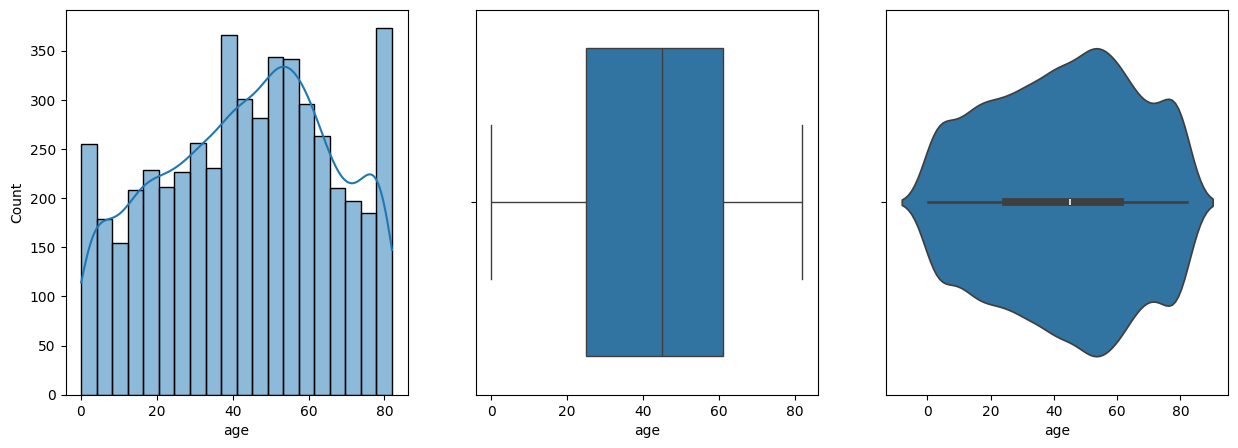

: 

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = df, x = df['age'], ax = ax[1])
sns.violinplot(data = df, x = df['age'], ax = ax[2])
plt.show()

<span style="font-size: 24px; color: blue;">Average Glucose Level</span>

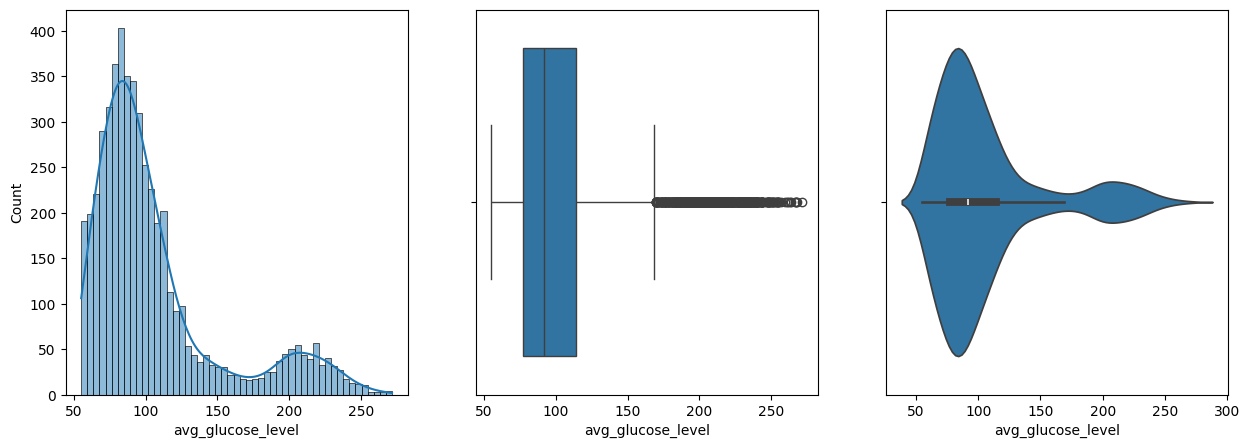

: 

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['avg_glucose_level'], ax = ax[0], kde=True)    ## Glucose_level Visualization
sns.boxplot(data = df, x = df['avg_glucose_level'], ax = ax[1])
sns.violinplot(data = df, x = df['avg_glucose_level'], ax = ax[2])
plt.show()

There are outliers present in avgerage_glucose column, we dont have to remove the outliers.

If we will not remove it will be help to our model to predict or perform well.

<span style="font-size: 24px; color: blue;">BMI</span>

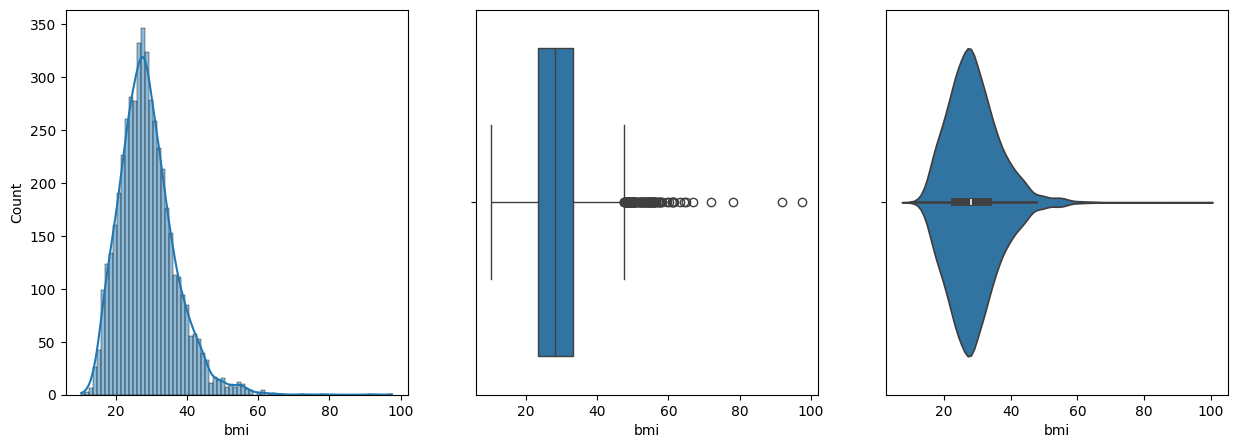

: 

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['bmi'], ax = ax[0], kde=True)     ## BMI Visualization
sns.boxplot(data = df, x = df['bmi'], ax = ax[1])
sns.violinplot(data = df, x = df['bmi'], ax = ax[2])
plt.show()

<span style="font-size: 24px; color: blue;">Cleaning Data</span>

In [ ]:
df.isnull().sum()   ##  Drop nulls or treat null values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

: 

The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on. Looking into it I found that bmi mostly depends on age and gender. So trying to impute missing values based on gender.

After looking the data we get to know that there are 201 NA values in bmi column, so for treating the data we will put the nan values as median.

In [ ]:
print(df['bmi'].median())

df = df.fillna(28.1)
df.info()

28.1
<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.0+ KB


: 

In BMI Visualization of box plot, we can see there are outliers in our data.

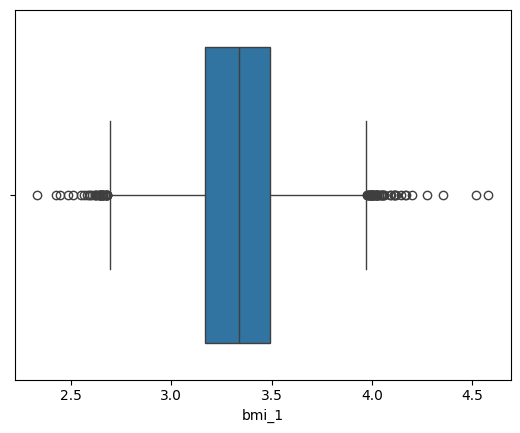

: 

In [ ]:
df['bmi_1'] = np.log(df['bmi'])

sns.boxplot(data = df, x = df['bmi_1'])
plt.show()

In [ ]:
df.drop('bmi', axis = 1, inplace = True )  ## Dropping earlier column of bmi
df_1 = df.copy()

: 

<span style="font-size: 24px; color: blue;">Convert Non -Numerical Data into Numerical Data</span></h2>

In [ ]:
df_1["gender"][df_1["gender"]=="Male"] = 1
df_1["gender"][df_1["gender"]=="Female"] = 0

: 

In [ ]:
df_1["ever_married"][df_1["ever_married"]=="Yes"]=1
df_1["ever_married"][df_1["ever_married"]=="No"]=0

: 

In [ ]:
df_1["Residence_type"][df_1["Residence_type"]=="Urban"]=1
df_1["Residence_type"][df_1["Residence_type"]=="Rural"]=0

: 

In [ ]:
df_1["work_type"][df_1["work_type"]=="Private"]=1
df_1["work_type"][df_1["work_type"]=="Self-employed"]=2
df_1["work_type"][df_1["work_type"]=="Govt_job"]=3
df_1["work_type"][df_1["work_type"]=="children"]=4
df_1["work_type"][df_1["work_type"]=="Never_worked"]=5

: 

In [ ]:
df_1["smoking_status"][df_1["smoking_status"]=="never smoked"]=1
df_1["smoking_status"][df_1["smoking_status"]=="Unknown"]=2
df_1["smoking_status"][df_1["smoking_status"]=="formerly smoked"]=3
df_1["smoking_status"][df_1["smoking_status"]=="smokes"]=4

: 

<span style="font-size: 24px; color: blue;">Splitting Data into Train & Test Set</span></h2>

In [ ]:
X = df_1.drop(columns = 'stroke')  
y = df_1[['stroke']]

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 12, stratify = y )  ## Spliting data into train and test

X_train.shape,X_test.shape,y_train.shape,y_test.shape   ## Shape of the train and test data

((3831, 10), (1278, 10), (3831, 1), (1278, 1))

: 

<span style="font-size: 28px; color: red;">Model Building (Simple Models)</span></h2>

<span style="font-size: 24px; color: blue;">Logistic Regression</span>

In [ ]:
logistic_model = LogisticRegression()    ## Importing Model 
logistic_model.fit(X_train,y_train)

# Checking the intercept and coefficient values.
print("Intercept =" , logistic_model.intercept_)
print("coefficients = \n " , logistic_model.coef_)

Intercept = [-5.62175988]
coefficients = 
  [[-0.214495    0.07441457  0.70005262  0.26950571 -0.53310948 -0.01920566
  -0.00655235  0.00306663  0.08497607 -0.52183437]]


: 

In [ ]:
# calculating the Accuracy, Sensitivity, Specificity  of the model on train data

predict1 = logistic_model.predict(X_train)
cm1 = confusion_matrix(y_train,predict1)
print("COnfusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
Accuracy = (cm1[0,0] + cm1[1,1]) / total1
print("Overall accuracy on train data for all the variables = " , Accuracy)
print ('Accuracy : ', Accuracy)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

COnfusion matrix = 
 [[3643    1]
 [ 186    1]]
Overall accuracy on train data for all the variables =  0.9511876794570608
Accuracy :  0.9511876794570608
Sensitivity :  0.9997255762897914
Specificity :  0.0053475935828877


: 

In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)

    # Predicting using the test data
    predict = logistic.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test,y_test)

    # Predicting using the test data
    predict = logistic.predict(X_test)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.9519015659955258), np.float64(0.9527404921700223), np.float64(0.9524608501118568), np.float64(0.9496644295302014), np.float64(0.9521812080536913), np.float64(0.9493847874720358), np.float64(0.9510626398210291), np.float64(0.950503355704698), np.float64(0.9510626398210291), np.float64(0.9513422818791947), np.float64(0.947986577181208), np.float64(0.9493847874720358), np.float64(0.9541387024608501), np.float64(0.9521812080536913), np.float64(0.9574944071588367), np.float64(0.9544183445190156), np.float64(0.950503355704698), np.float64(0.9493847874720358), np.float64(0.9521812080536913), np.float64(0.9491051454138703), np.float64(0.9524608501118568), np.float64(0.9510626398210291), np.float64(0.9496644295302014), np.float64(0.9496644295302014), np.float64(0.9510626398210291), np.float64(0.9513422818791947), np.float64(0.9524608501118568), np.float64(0.9513422818791947), np.float64(0.9527404921700223), np.float64(0.9493847874720358), np.float64(0.95302

: 

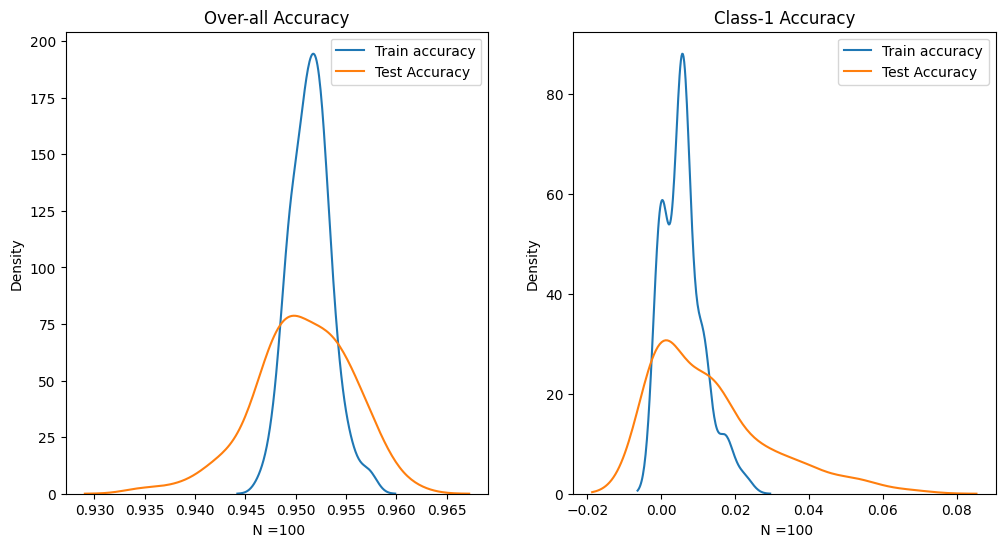

: 

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

<span style="font-size: 24px; color: blue;">Decision Tree</span>

In [ ]:
feature = ['age','hypertension','heart_disease','avg_glucose_level','bmi_1','gender_Male','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']

: 

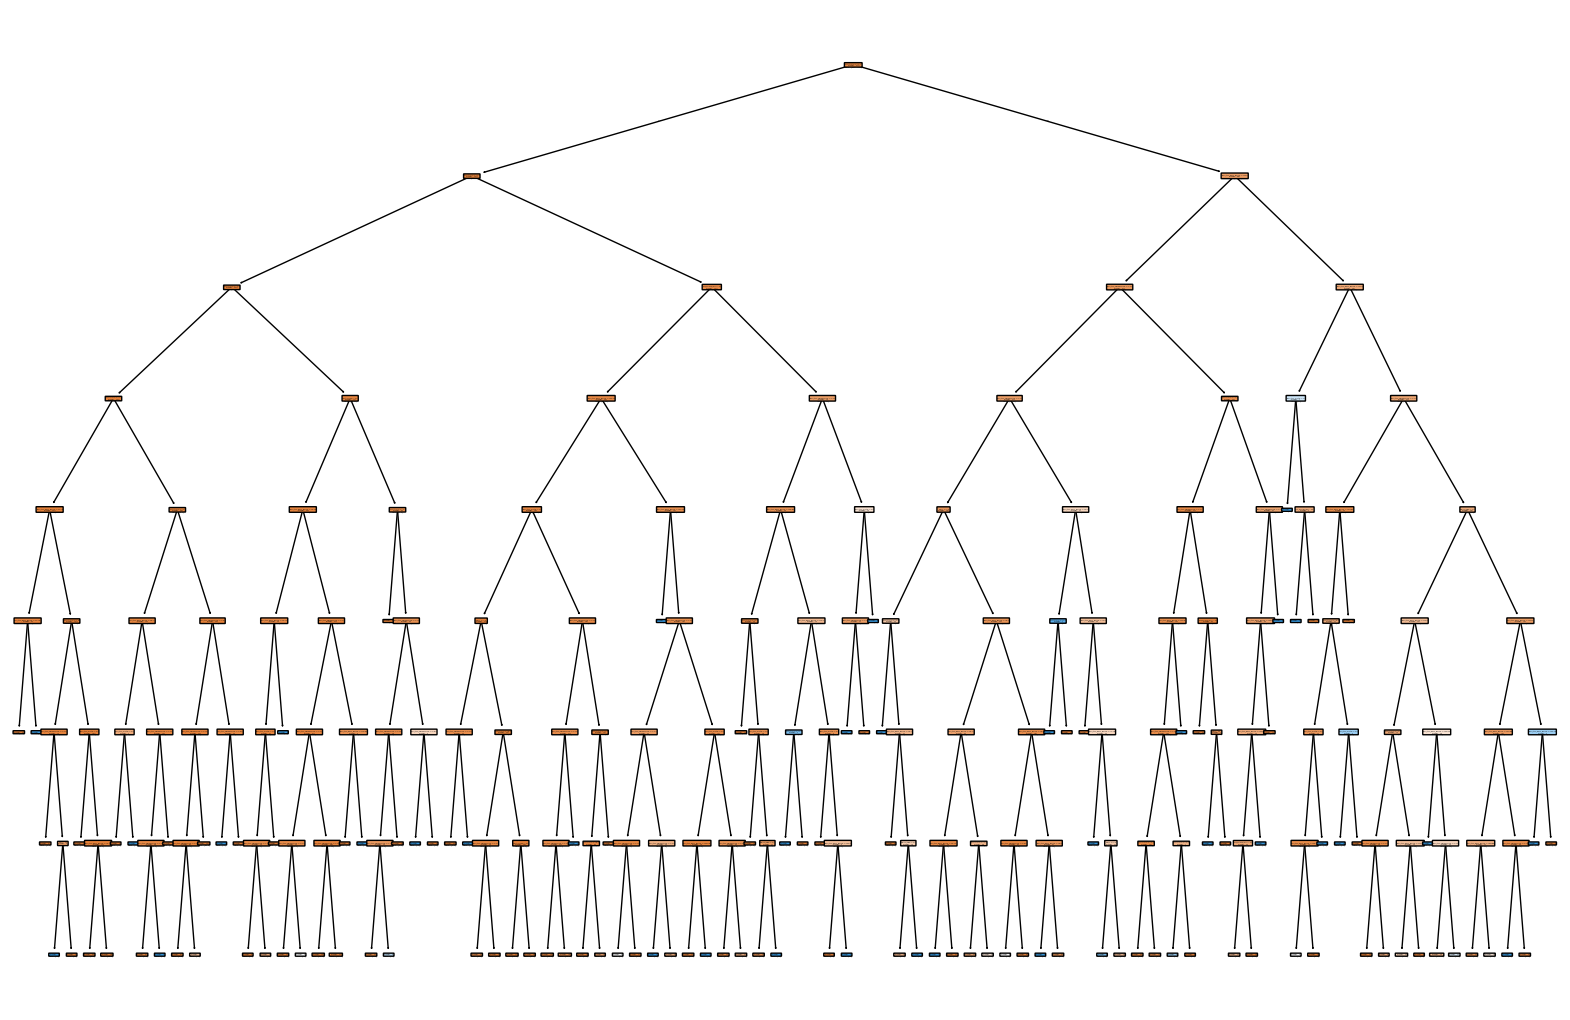

: 

In [ ]:
from sklearn import tree
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=8)
DTree.fit(X,y)

##Plotting the trees 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,13))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = feature)
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=12,max_depth=8)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=12)

: 

In [ ]:
predict1 = dt_model.predict(X_train)
predict2 = dt_model.predict(X_test)

cm = confusion_matrix(y_train, predict1)
print ("CM:",   cm)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

CM: [[3383   10]
 [ 104   79]]
Train Accuracy 0.9681208053691275
Test Accuracy 0.9425962165688193
Sensitivity :  0.9970527556734453
Specificity :  0.43169398907103823


: 

In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_test)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.970917225950783), np.float64(0.9633668903803132), np.float64(0.9644854586129754), np.float64(0.9689597315436241), np.float64(0.9664429530201343), np.float64(0.9658836689038032), np.float64(0.9628076062639821), np.float64(0.9711968680089486), np.float64(0.9664429530201343), np.float64(0.9686800894854586), np.float64(0.968400447427293), np.float64(0.9656040268456376), np.float64(0.9720357941834452), np.float64(0.9644854586129754), np.float64(0.970917225950783), np.float64(0.9725950782997763), np.float64(0.9739932885906041), np.float64(0.970917225950783), np.float64(0.9700782997762863), np.float64(0.9672818791946308), np.float64(0.9639261744966443), np.float64(0.9667225950782998), np.float64(0.9661633109619687), np.float64(0.9644854586129754), np.float64(0.9664429530201343), np.float64(0.9661633109619687), np.float64(0.9717561521252797), np.float64(0.9653243847874721), np.float64(0.9661633109619687), np.float64(0.9692393736017897), np.float64(0.965324

: 

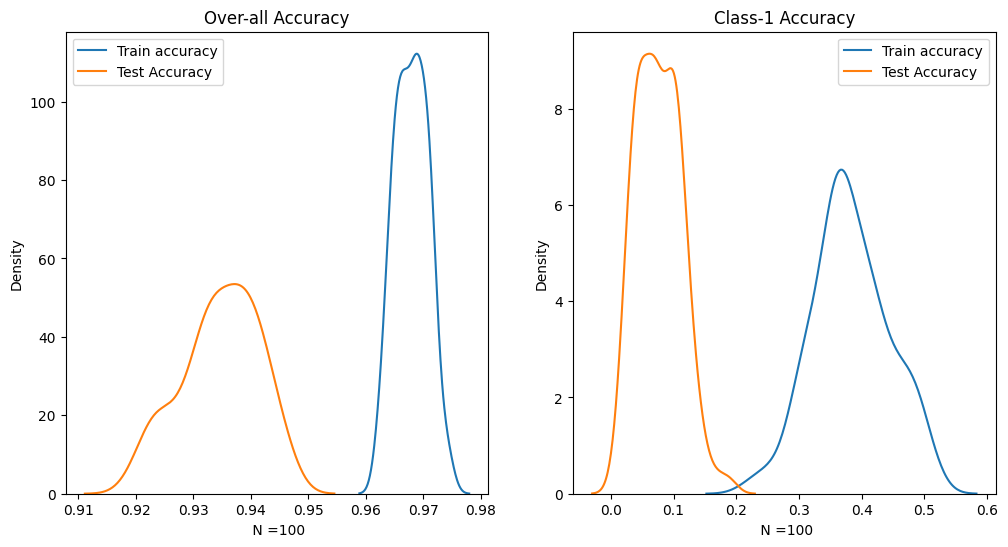

: 

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

<span style="font-size: 28px; color: red;">Feature Engineering</span>

<span style="font-size: 24px; color: blue;">One Hot-Encoding</span>

In [ ]:
df_2 = df.copy()

num_cols = ['age','avg_glucose_level','bmi_1']         ## Dividing numerical and categorical data for numerical.
cat_col = ['work_type','smoking_status']
cat_cols = ['gender','ever_married','Residence_type']

df_encc = pd.get_dummies(df_2[cat_cols], drop_first=True)
df_enc = pd.get_dummies(df_2[cat_col])

df_2[df_encc.columns] = df_encc
df_2[df_enc.columns] = df_enc
df_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,...,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,...,True,False,False,True,False,False,False,True,False,False
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,...,False,False,False,False,True,False,False,False,True,False
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,...,False,False,False,True,False,False,False,False,True,False
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,...,True,False,False,True,False,False,False,False,False,True
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,...,False,False,False,False,True,False,False,False,True,False


: 

In [ ]:
df_2.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis =1, inplace = True)
df_2

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,1,3.600048,True,True,True,False,False,True,False,False,False,True,False,False
1,61.0,0,0,202.21,1,3.335770,False,True,False,False,False,False,True,False,False,False,True,False
2,80.0,0,1,105.92,1,3.481240,True,True,False,False,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,1,3.538057,False,True,True,False,False,True,False,False,False,False,False,True
4,79.0,1,0,174.12,1,3.178054,False,True,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0,3.335770,False,True,True,False,False,True,False,False,False,False,True,False
5106,81.0,0,0,125.20,0,3.688879,False,True,True,False,False,False,True,False,False,False,True,False
5107,35.0,0,0,82.99,0,3.421000,False,True,False,False,False,False,True,False,False,False,True,False
5108,51.0,0,0,166.29,0,3.242592,True,True,False,False,False,True,False,False,False,True,False,False


: 

<span style="font-size: 24px; color: blue;">Over Sampling</span>

Looking at stroke visualization, we can tell that our data is not equally distributed. So here we will use over sampling method to balance our target variable.

In [ ]:
print("Actual Data :", df_2.shape)

#Frequency count on target column
freq = df_2['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
stroke_class0 = df_2[df_2['stroke'] == 0]
stroke_class1 = df_2[df_2['stroke'] == 1]

print("Class0 Actual :", stroke_class0.shape)
print("Class1 Actual  :", stroke_class1.shape)


Actual Data : (5109, 18)
stroke
0    4860
1     249
Name: count, dtype: int64
stroke
0    95.126248
1     4.873752
Name: count, dtype: float64
Class0 Actual : (4860, 18)
Class1 Actual  : (249, 18)


: 

In [ ]:
##Undersampling of class-0
## Consider half of class-0
stroke_class0_under = stroke_class0.sample(int(0.5*len(stroke_class0)))
print("Class0 Undersample :", stroke_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
stroke_class1_over = stroke_class1.sample(8*len(stroke_class1),replace=True)
print("Class1 Oversample :", stroke_class1_over.shape)

#Concatenate to create the final balanced data
stroke_balanced=pd.concat([stroke_class0_under,stroke_class1_over])
print("Final Balannced Data :", stroke_balanced.shape)

#Frequency count on target column in the balanced data
freq=stroke_balanced['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)

Class0 Undersample : (2430, 18)
Class1 Oversample : (1992, 18)
Final Balannced Data : (4422, 18)
stroke
0    2430
1    1992
Name: count, dtype: int64
stroke
0    54.95251
1    45.04749
Name: count, dtype: float64


: 

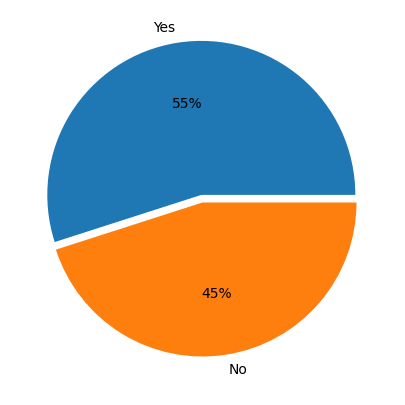

: 

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(x=stroke_balanced['stroke'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['Yes','No'])
plt.show()

<span style="font-size: 24px; color: blue;">Correlation Matrix</span>

In [ ]:
stroke_balanced

df_3 = stroke_balanced.copy()

corr_matrix = df_3.corr()   ## Corrlation Matrix.
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.272964,0.262409,0.248360,0.570064,0.265384,-0.001712,0.566973,0.022315,0.079558,-0.092845,0.080179,0.272115,-0.618982,-0.310354,0.196000,0.104646,0.010588
hypertension,0.272964,1.000000,0.080267,0.168454,0.233765,0.130534,0.021948,0.107490,-0.019172,-0.009800,-0.024771,-0.038493,0.150343,-0.131051,-0.189646,0.071326,0.115987,-0.008337
heart_disease,0.262409,0.080267,1.000000,0.224487,0.206988,0.065565,0.122396,0.085269,0.013065,0.027931,-0.019273,0.032604,0.006587,-0.099264,-0.066693,0.017726,-0.042439,0.116927
avg_glucose_level,0.248360,0.168454,0.224487,1.000000,0.237673,0.252309,0.092100,0.189459,-0.005674,0.026938,-0.030847,0.060774,-0.005936,-0.128227,-0.097891,0.072370,-0.012131,0.051862
stroke,0.570064,0.233765,0.206988,0.237673,1.000000,0.130250,0.017840,0.254855,0.026850,0.023610,-0.051025,0.038103,0.112100,-0.250027,-0.135379,0.121210,0.001600,0.023145
bmi_1,0.265384,0.130534,0.065565,0.252309,0.130250,1.000000,-0.001536,0.324313,0.000307,0.029030,-0.043708,0.185058,0.057238,-0.443440,-0.262203,0.116160,0.091430,0.060946
gender_Male,-0.001712,0.021948,0.122396,0.092100,0.017840,-0.001536,1.000000,0.023539,0.000680,-0.063521,0.001037,0.047679,-0.037496,0.047804,0.039165,0.063382,-0.132860,0.059081
ever_married_Yes,0.566973,0.107490,0.085269,0.189459,0.254855,0.324313,0.023539,1.000000,-0.055042,0.055489,-0.098115,0.156447,0.129863,-0.519074,-0.286733,0.181151,0.028394,0.101204
Residence_type_Urban,0.022315,-0.019172,0.013065,-0.005674,0.026850,0.000307,0.000680,-0.055042,1.000000,0.009942,0.029163,-0.009303,0.004979,-0.008897,0.032656,-0.008185,-0.032418,0.013466
work_type_Govt_job,0.079558,-0.009800,0.027931,0.026938,0.023610,0.029030,-0.063521,0.055489,0.009942,1.000000,-0.022372,-0.470039,-0.195623,-0.118360,-0.012849,-0.004697,0.007686,0.010472


: 

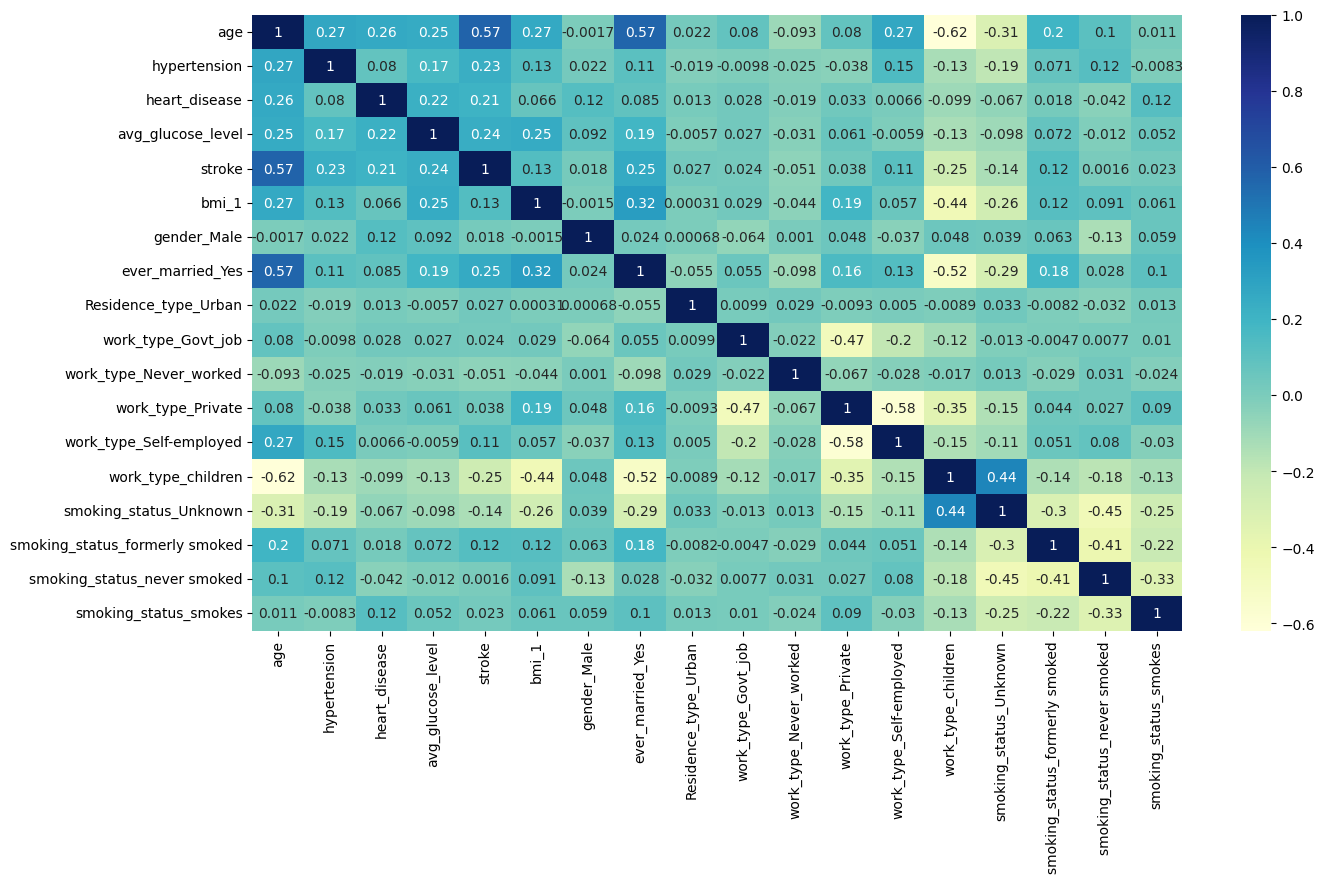

: 

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")    ## Heat map 
plt.show()

<span style="font-size: 24px; color: blue;">Splitting data into train & test set</span>

In [ ]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1, y_1, random_state = 12)  ## Spliting data into train and test

: 

In [ ]:
X_1 = df_3.drop(columns = 'stroke')  
y_1 = df_3[['stroke']]

X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape   ## Shape of the train and test data


((3316, 17), (1106, 17), (3316, 1), (1106, 1))

: 

<span style="font-size: 28px; color: red;">Model Building</span>

<span style="font-size: 24px; color: blue;">Logistic Regression</span>

In [ ]:
logistic_model = LogisticRegression()    ## Importing Model 
logistic_model.fit(X_train_1,y_train_1)

LogisticRegression()

: 

In [ ]:
logistic_pred_train = logistic_model.predict(X_train_1)
print('Accuracy Score                 :',round(accuracy_score(y_train_1,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,logistic_pred_train))

Accuracy Score                 : 0.7814
Precision Score                : 0.7382
Recall Score                   : 0.7915
Confusion Matrix               :
 [[1418  416]
 [ 309 1173]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.82      0.77      0.80      1834
           1       0.74      0.79      0.76      1482

    accuracy                           0.78      3316
   macro avg       0.78      0.78      0.78      3316
weighted avg       0.78      0.78      0.78      3316



: 

In [ ]:
logistic_pred_test = logistic_model.predict(X_test_1)
print('Accuracy Score                 :',round(accuracy_score(y_test_1,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,logistic_pred_test))

Accuracy Score                 : 0.7676
Precision Score                : 0.7279
Recall Score                   : 0.7922
Confusion Matrix               :
 [[445 151]
 [106 404]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       596
           1       0.73      0.79      0.76       510

    accuracy                           0.77      1106
   macro avg       0.77      0.77      0.77      1106
weighted avg       0.77      0.77      0.77      1106



: 

Area Under Curve     : 0.7694005790235556


Text(0, 0.5, 'True Positive Rate')

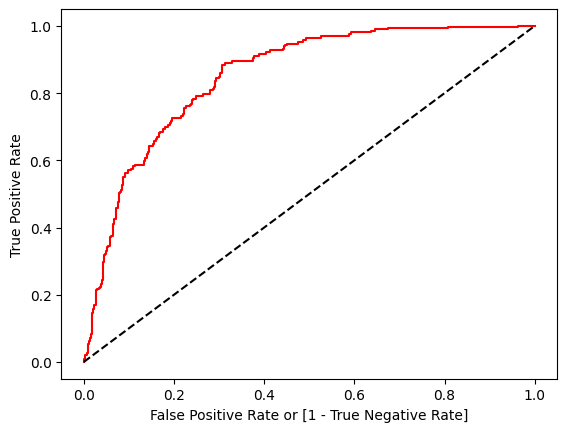

: 

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1,logistic_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, logistic_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = logistic.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test_1,y_test_1)

    # Predicting using the test data
    predict = logistic.predict(X_test_1)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.7612277867528271), np.float64(0.7696284329563813), np.float64(0.7676898222940226), np.float64(0.7625201938610663), np.float64(0.762843295638126), np.float64(0.7654281098546042), np.float64(0.7638126009693054), np.float64(0.7773828756058159), np.float64(0.772859450726979), np.float64(0.7654281098546042), np.float64(0.7683360258481422), np.float64(0.7722132471728594), np.float64(0.7560581583198708), np.float64(0.7683360258481422), np.float64(0.7709208400646204), np.float64(0.7686591276252019), np.float64(0.7596122778675283), np.float64(0.7686591276252019), np.float64(0.7612277867528271), np.float64(0.7618739903069467), np.float64(0.7693053311793215), np.float64(0.7712439418416801), np.float64(0.762843295638126), np.float64(0.7722132471728594), np.float64(0.7676898222940226), np.float64(0.7673667205169629), np.float64(0.7731825525040388), np.float64(0.7631663974151858), np.float64(0.7651050080775444), np.float64(0.7667205169628433), np.float64(0.76219

: 

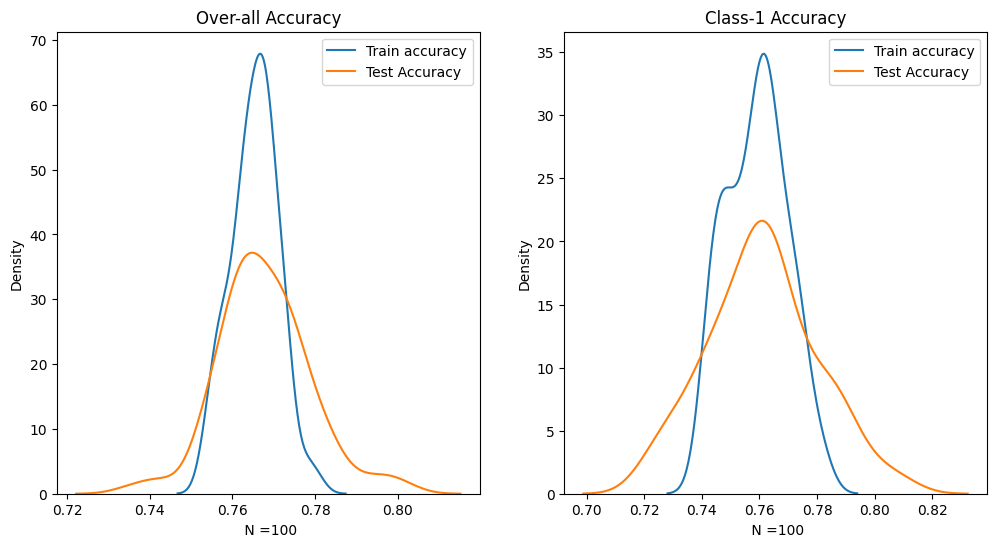

: 

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

<span style="font-size: 24px; color: blue;">Decision Tree</span>

In [ ]:
dt_model = DecisionTreeClassifier(random_state=15,max_depth=9)
dt_model.fit(X_train_1,y_train_1)

DecisionTreeClassifier(max_depth=9, random_state=15)

: 

In [ ]:
dt_pred_train = dt_model.predict(X_train_1)
print('Accuracy Score                 :',round(accuracy_score(y_train_1,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,dt_pred_train))

Accuracy Score                 : 0.9179
Precision Score                : 0.8549
Recall Score                   : 0.9872
Confusion Matrix               :
 [[1450  236]
 [  18 1391]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      1686
           1       0.85      0.99      0.92      1409

    accuracy                           0.92      3095
   macro avg       0.92      0.92      0.92      3095
weighted avg       0.93      0.92      0.92      3095



: 

In [ ]:
dt_pred_test = dt_model.predict(X_test_1)
print('Accuracy Score                 :',round(accuracy_score(y_test_1,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,dt_pred_test))

Accuracy Score                 : 0.8809
Precision Score                : 0.7947
Recall Score                   : 0.9828
Confusion Matrix               :
 [[596 148]
 [ 10 573]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.98      0.80      0.88       744
           1       0.79      0.98      0.88       583

    accuracy                           0.88      1327
   macro avg       0.89      0.89      0.88      1327
weighted avg       0.90      0.88      0.88      1327



: 

Area Under Curve     : 0.8919613050775557


Text(0, 0.5, 'True Positive Rate')

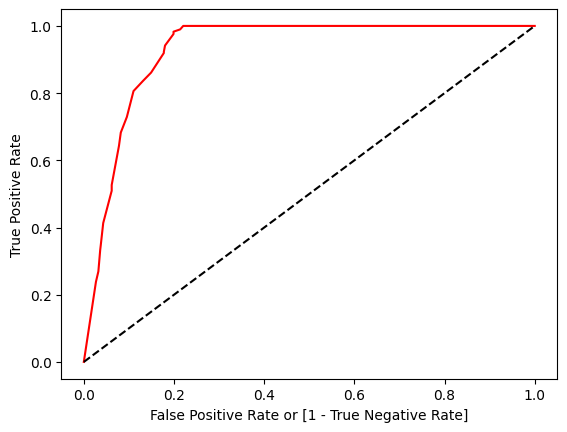

: 

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1,dt_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, dt_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_test_1)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [np.float64(0.9079159935379645), np.float64(0.9169628432956382), np.float64(0.9033925686591276), np.float64(0.9095315024232633), np.float64(0.9117932148626817), np.float64(0.9156704361873991), np.float64(0.902746365105008), np.float64(0.9011308562197092), np.float64(0.9205169628432956), np.float64(0.9221324717285945), np.float64(0.918578352180937), np.float64(0.9124394184168013), np.float64(0.9001615508885299), np.float64(0.9140549273021001), np.float64(0.9017770597738287), np.float64(0.9150242326332795), np.float64(0.9008077544426495), np.float64(0.9172859450726979), np.float64(0.9082390953150242), np.float64(0.9095315024232633), np.float64(0.9101777059773829), np.float64(0.9166397415185783), np.float64(0.904361873990307), np.float64(0.9176090468497576), np.float64(0.9082390953150242), np.float64(0.918578352180937), np.float64(0.901453957996769), np.float64(0.9111470113085622), np.float64(0.9008077544426495), np.float64(0.9108239095315024), np.float64(0.9098546

: 

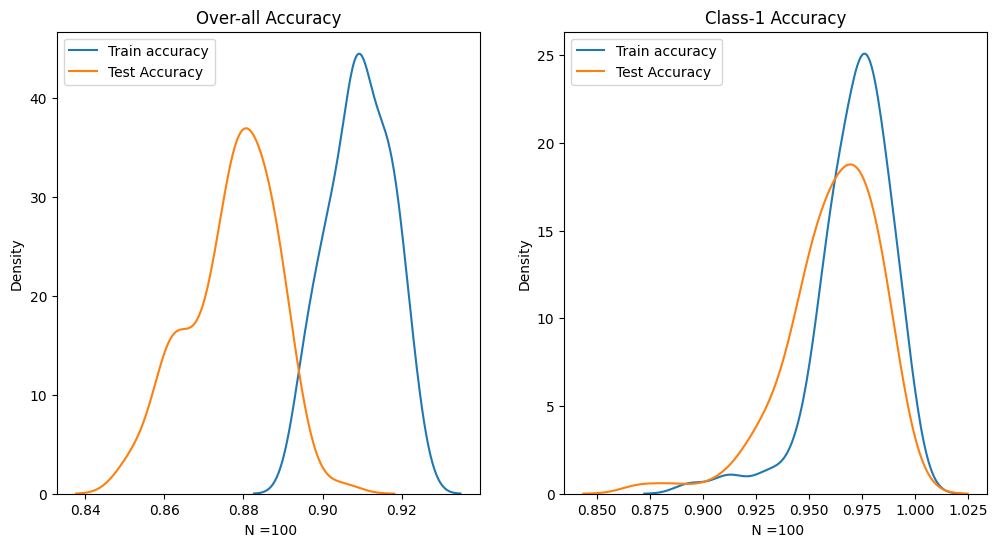

: 

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()